<a href="https://colab.research.google.com/github/adrianciemerych/customer_personality_analysis_project/blob/main/customer_personality_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import sklearn
from sklearn.impute import SimpleImputer

pd.set_option('display.max_columns', None)
sklearn.__version__

'1.2.2'

In [135]:
# Load the dataset
all_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/customer_personality_analysis/marketing_campaign.csv', sep = '\t')
all_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [136]:
# Info about the dataset
data = all_data.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

From all of the attributes only Income has null values.

In [137]:
# First 40 rows of dataset sorted by Income, including rows where Income is null
data.sort_values('Income', na_position = 'first').head(40)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


In [138]:
# Computing means for the whole dataset and for the rows where the Income is null
mean_data = data.describe().T['mean']
mean_data_null_income = data[data['Income'].isnull()].describe().T['mean']

# Comparing means in a common dataframe
mean_comparison = pd.concat([mean_data, mean_data_null_income], axis = 1)
mean_comparison.columns = ['mean', 'nulls_mean']
mean_comparison

,mean,nulls_mean
ID,5592.159821,5943.625000
Year_Birth,1968.805804,1967.458333
Income,52247.251354,NaN
Kidhome,0.444196,0.666667
Teenhome,0.506250,0.583333
Recency,49.109375,58.041667
MntWines,303.935714,197.208333
MntFruits,26.302232,21.333333
MntMeatProducts,166.950000,162.708333
MntFishProducts,37.525446,27.166667


We can't see significant divergences between these two means. In the next step null values of Income will be filled in with the mean

In [139]:
# Replacing null values in Income column with the mean of this column
imputer = SimpleImputer()
data[['Income']] = imputer.fit_transform(data[['Income']])
data['Income'].isnull().sum()

0

In [140]:
# Describing the numerical data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2240.0,52247.251354,25037.797168,1730.0,35538.75,51741.5,68289.75,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


From the above features description we can read the following abnormal informations:

* In the Year_Birth we can see that the minimum value is equal to 1893. It seems to be unbelievable and it must be checked.
* In column Income the maximum value is equal to 666666, where mean is equal to 52000
* The columns named Z_CostContact and Z_Revenue have only one value and it is respectively 3 and 11. These columns don't contribute anything, what is valuable to this dataset

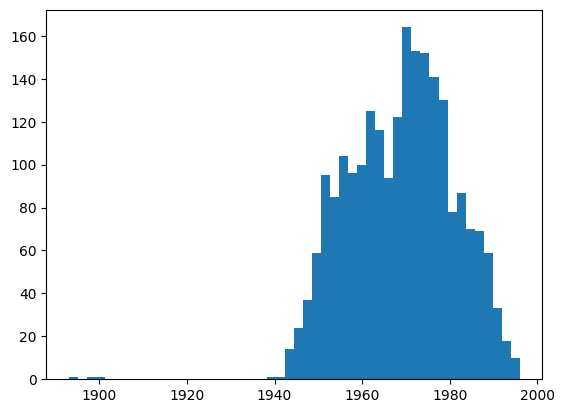

In [141]:
# Plotting a distribution of the Year_Birth
plt.hist(data['Year_Birth'], bins = 50)
plt.show()

In [142]:
# Displaying the rows with Year_Birth outliers
data[data['Year_Birth'] < 1920]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0


The dataset length: 2237


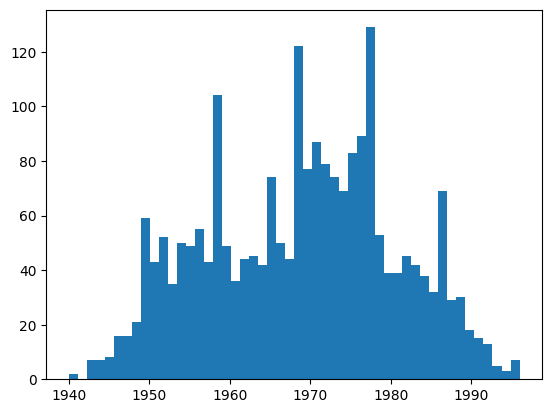

In [143]:
# Removing inconsistent data in term of birth year
data = data[data['Year_Birth'] >= 1920]
print('The dataset length:', len(data))

# Plot a distribution after removing the redundant rows
plt.hist(data['Year_Birth'], bins = 50)
plt.show()

In [144]:
# Checking, if the number of all purchases is different from zero (condition_one)
# and also if the number of deals purchases is lower or equal to the number
# of all purchases (condition_two)

condition_one = ((data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']) == 0)
condition_two = (data['NumDealsPurchases'] > (data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']))

inconsistent_purchases = data[condition_one | condition_two]
inconsistent_purchases[['Recency', 'NumDealsPurchases',	'NumWebPurchases',
                        'NumCatalogPurchases',	'NumStorePurchases']]

,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
655,81,0,0,0,0
981,20,0,0,0,0
1042,62,15,0,1,0
1245,65,15,0,0,0
1524,56,0,0,0,0
1846,29,15,0,0,0
2132,85,0,0,0,0


These rows are inconsistent with the data, because:

* in the data can't be the rows where customer has 0 purchases
* in the data can't be the rows where deals purchases surpassing the total number of all purchases

In [145]:
# Removing the inconsistent rows
data = data[~(condition_one | condition_two)]
data.shape

(2230, 29)

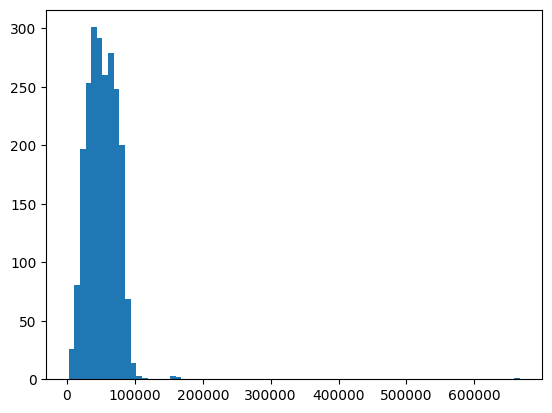

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
124,7215,1983,Graduation,Single,101970.0,0,0,12-03-2013,69,722,27,102,44,72,168,0,6,8,13,2,0,1,1,1,0,0,3,11,1
203,2798,1977,PhD,Together,102160.0,0,0,02-11-2012,54,763,29,138,76,176,58,0,7,9,10,4,0,1,1,1,0,0,3,11,1
252,10089,1974,Graduation,Divorced,102692.0,0,0,05-04-2013,5,168,148,444,32,172,148,1,6,9,13,2,0,1,1,1,1,0,3,11,1
646,4611,1970,Graduation,Together,105471.0,0,0,21-01-2013,36,1009,181,104,202,21,207,0,9,8,13,3,0,0,1,1,0,0,3,11,1
1898,4619,1945,PhD,Single,113734.0,0,0,28-05-2014,9,6,2,3,1,262,3,0,27,0,0,1,0,0,0,0,0,0,3,11,0
1653,4931,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,3,11,0
164,8475,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,3,11,0
617,1503,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,3,11,0


In [146]:
# Checking the Income distribution
plt.hist(x = data['Income'], bins = 80)
plt.show()

data[data['Income'] > 100000].sort_values('Income')

In [147]:
# Removing row with income equal to 666666, because it is too far from the mean
data = data.drop(index = [2233])

# Dropping the columns that are unnecessary
data = data.drop(columns = ['ID', 'Z_CostContact', 'Z_Revenue'])

In [148]:
data.nunique()

Year_Birth               56
Education                 5
Marital_Status            8
Income                 1964
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                775
MntFruits               158
MntMeatProducts         557
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        14
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
dtype: int64

In [149]:
data[['Education', 'Marital_Status']].describe()

,Education,Marital_Status
count,2229,2229
unique,5,8
top,Graduation,Married
freq,1121,862
